In [1]:
# Install graphviz if not already installed
%pip install graphviz

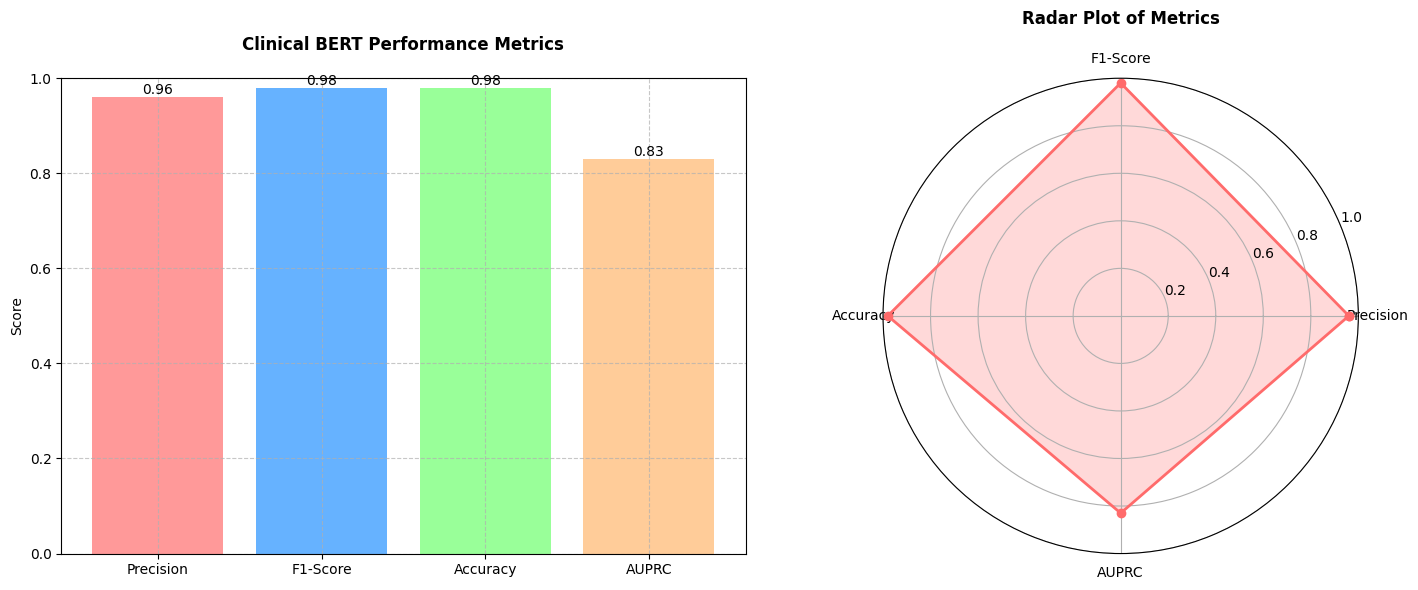

Visualizations have been created and saved as 'clinical_bert_metrics.png'


In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create the data
metrics_data = {
    'Metric': ['Precision', 'F1-Score', 'Accuracy', 'AUPRC'],
    'Value': [0.96, 0.98, 0.98, 0.83]
}

df = pd.DataFrame(metrics_data)

# Set figure style
plt.figure(figsize=(15, 6))

# 1. Bar Plot
plt.subplot(121)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
bars = plt.bar(df['Metric'], df['Value'], color=colors)
plt.title('Clinical BERT Performance Metrics', pad=20, fontsize=12, fontweight='bold')
plt.ylim(0, 1.0)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.ylabel('Score')

# 2. Radar Plot
ax = plt.subplot(122, projection='polar')

# Prepare data for radar plot
values = df.Value.tolist()
values += values[:1]  # Repeat first value to close the polygon

angles = np.linspace(0, 2*np.pi, len(df.Metric), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Repeat first angle to close the polygon

# Plot radar
ax.plot(angles, values, 'o-', linewidth=2, color='#FF6B6B')
ax.fill(angles, values, alpha=0.25, color='#FF6B6B')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df.Metric)
ax.set_ylim(0, 1)

# Add circular gridlines
ax.set_rticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.grid(True)

# Add title
ax.set_title('Radar Plot of Metrics', pad=20, fontsize=12, fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.savefig('clinical_bert_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualizations have been created and saved as 'clinical_bert_metrics.png'")